Python中最强大的图论库——networkx


官方文档：https://www.osgeo.cn/networkx/reference/introduction.html

[图的创建官方API](https://www.osgeo.cn/networkx/reference/convert.html)

[CSDN博客：networkx图的创建、基本属性、绘制](https://blog.csdn.net/youcans/article/details/116942703)

In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### 一、最短路径
[官方文档——计算最短路径API](https://www.osgeo.cn/networkx/reference/algorithms/shortest_paths.html#module-networkx.algorithms.shortest_paths.astar)

[CSDN博客——最短路径](https://blog.csdn.net/youcans/article/details/116999881)

[CSDN博客——条件最短路径](https://blog.csdn.net/weixin_48967543/article/details/117121258)：即不能经过指定边或顶点等，大概率只能自己编程

含Dijkstra算法、Floy_WallShall算法(稠密图)、Bellman Flod算法、A*算法、johnson算法

或判断是否可达、是否存在负圈

C:\Users\think\AppData\Local\Temp\ipykernel_19896\2001757920.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  print(np.array(nx.adjacency_matrix(G).todense()))


[[0 1 1 1 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 3 0 0 0 0 7]
 [1 0 3 0 2 0 0 0 0]
 [1 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 7 5 4]
 [0 0 0 0 0 7 0 0 0]
 [0 0 0 0 0 5 0 0 0]
 [0 0 7 0 0 4 0 0 0]]


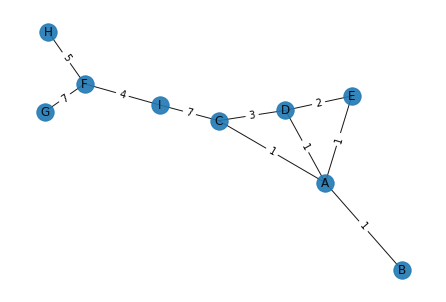

In [19]:
# 可从DataFrame中读取数据
NXdata=pd.read_excel('图1.xlsx',index_col=0) # 图1.xlsx即为邻接矩阵，第一行第一列为顶点名称
G=nx.from_pandas_adjacency(NXdata)
# 打印邻接矩阵
print(np.array(nx.adjacency_matrix(G).todense()))
pos = nx.spring_layout(G) # 指定顶点位置
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos, with_labels=True, alpha=0.9)
nx.draw_networkx_edge_labels(G,pos,labels)
plt.show()

In [20]:
source = 'A'
target = 'F'
path = nx.shortest_path(G,source,target)
length = nx.dijkstra_path_length(G,source,target) # 带权重长度
# length = nx.astar_path_length(G,source,target) # 采用A*算法计算最短路径
length_ = nx.shortest_path_length(G,source,target) # 不带权长度
print(f"从{source}到{target}的最短路径为：{path}，长度为：{length}")

从A到F的最短路径为：['A', 'C', 'I', 'F']，长度为：12


### 二、遍历
[官方文档——遍历API](https://www.osgeo.cn/networkx/reference/algorithms/traversal.html)

含**深度优先遍历**、**广度优先遍历**

深度优先搜索结果：[(1, 2), (2, 3), (3, 4), (4, 7), (7, 6), (6, 5), (5, 8), (8, 9), (9, 10), (10, 11)]
广度优先搜索结果：[(1, 2), (1, 3), (1, 4), (2, 5), (3, 6), (3, 7), (5, 8), (5, 9), (7, 10), (8, 11)]


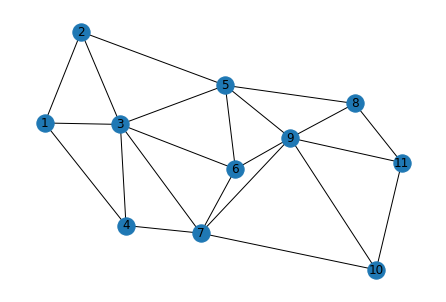

In [21]:
G = nx.Graph()  # 创建：空的 无向图
G.add_weighted_edges_from([(1,2,2),(1,3,8),(1,4,1),
                            (2,3,6),(2,5,1),
                            (3,4,7),(3,5,5),(3,6,1),(3,7,2),
                            (4,7,9),
                            (5,6,3),(5,8,2),(5,9,9),
                            (6,7,4),(6,9,6),
                            (7,9,3),(7,10,1),
                            (8,9,7),(8,11,9),
                            (9,10,1),(9,11,2),
                            (10,11,4)])  # 向图中添加多条赋权边: (node1,node2,weight)
pos = nx.spring_layout(G) # 指定顶点位置
nx.draw(G,with_labels=True,pos=pos)
print(f"深度优先搜索结果：{list(nx.dfs_edges(G,source=1))}")
print(f"广度优先搜索结果：{list(nx.bfs_edges(G,source=1))}")

### 三、生成树
[官方文档——树API](https://www.osgeo.cn/networkx/reference/algorithms/tree.html#module-networkx.algorithms.tree.mst)

[参考博客](https://blog.csdn.net/youcans/article/details/117150351)

含最小生成树Prim算法(适合稠密图)、Kruskal算法(适合稀疏图)、最大生成树


使用Kruskal算法得到的最小生成树：
[(1, 4, {'weight': 1}), (2, 5, {'weight': 1}), (3, 6, {'weight': 1}), (7, 10, {'weight': 1}), (9, 10, {'weight': 1}), (1, 2, {'weight': 2}), (3, 7, {'weight': 2}), (5, 8, {'weight': 2}), (9, 11, {'weight': 2}), (5, 6, {'weight': 3})]
使用Prim算法得到的最小生成树：
[(1, 4), (1, 2), (2, 5), (5, 8), (5, 6), (6, 3), (3, 7), (7, 10), (10, 9), (9, 11)]


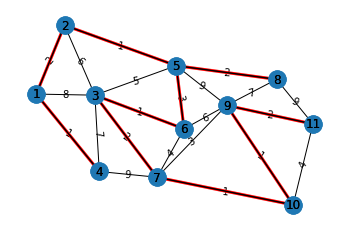

In [22]:
T = nx.minimum_spanning_tree(G)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels, font_color='black') # 显示边的权值
nx.draw_networkx_edges(G,pos,edgelist=T.edges,edge_color='r',width=3)  # 设置指定边的颜
nx.draw(T,with_labels=True,pos=pos)
nx.draw(G,with_labels=True,pos=pos)
# print(f"最小生成树边的权值：\n{sorted(T.edges(data=True))}")  # data=True 表示返回值包括边的权重
mst1 = nx.tree.minimum_spanning_edges(G, algorithm="kruskal",data=True) # 返回值:带权的边
mst2 = nx.tree.minimum_spanning_edges(G, algorithm="prim",data=False)  # data=False 表示返回值不带权
print(f"使用Kruskal算法得到的最小生成树：\n{list(mst1)}")
print(f"使用Prim算法得到的最小生成树：\n{list(mst2)}")
plt.show()

### 四、旅行商问题

最佳路线[0, 2, 3, 1, 0]


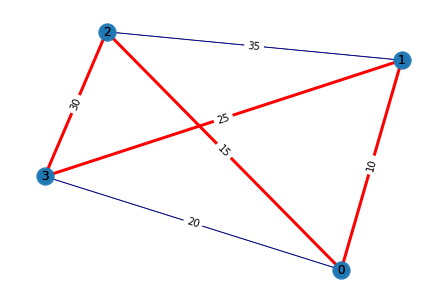

In [23]:
a = np.array([[0, 10, 15, 20], [10, 0, 35, 25], 
              [15, 35, 0, 30], [20, 25, 30, 0]])
G = nx.from_numpy_array(a, create_using=nx.Graph)

cycle = nx.algorithms.approximation.christofides(G, weight="weight")
print(f"最佳路线{cycle}")
edge_list = list(nx.utils.pairwise(cycle))

pos = nx.spring_layout(G) # 指定顶点位置
labels = nx.get_edge_attributes(G,'weight')
nx.draw(G, pos, with_labels=True, alpha=0.9)
nx.draw_networkx_edges(G, pos, edge_color="blue", width=0.5) # 绘制原图
# 绘制旅行商线路
nx.draw_networkx( 
    G,
    pos,
    with_labels=True,
    edgelist=edge_list,
    edge_color="red",
    node_size=200,
    width=3,
)
nx.draw_networkx_edge_labels(G,pos,labels)
plt.show()

### 五、欧拉图

判断哈密顿图是NP hard的，欧拉图不是

[官方API](https://www.osgeo.cn/networkx/reference/algorithms/euler.html)

In [24]:
G = nx.complete_graph(3)
print("是否为欧拉图：",nx.is_eulerian(G))
print(f"欧拉回路：{list(nx.eulerian_circuit(G))}")
print(f"欧拉回路中的顶点序列：{[u for u, v in nx.eulerian_circuit(G)]}")

是否为欧拉图： True
欧拉回路：[(0, 2), (2, 1), (1, 0)]
欧拉回路中的顶点序列：[0, 2, 1]


### 六、最大流
[官方API](https://www.osgeo.cn/networkx/reference/algorithms/flow.html)

[参考博客](https://blog.csdn.net/engineoid/article/details/107371618)

普通的最大流问题可用Ford-Fulkerson算法求解，**最小费用最大流问题**比最大流问题多考虑了网络上流的费用问题，在许多实际问题中，费用的因素很重要。例如，在运输问题中，人们总是希望在完成运输任务的同时，寻求一个使总的运输费用最小的运输方案。

求解普通的最大流问题只需将下面的代码weight参数改成同一个数即可

{'s': {'v1': 8, 'v3': 6}, 'v1': {'v3': 1, 'v2': 7}, 'v3': {'v4': 9}, 'v2': {'v3': 2, 't': 5}, 'v4': {'t': 9, 'v2': 0}, 't': {}}
205


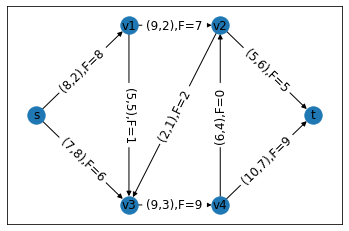

In [25]:
G = nx.DiGraph()#有向图
G.add_edges_from([('s','v1',{'capacity': 8, 'weight': 2}),
                  ('s','v3',{'capacity': 7, 'weight': 8}),
                  ('v1','v3',{'capacity': 5, 'weight': 5}),
                  ('v1','v2',{'capacity': 9, 'weight': 2}),
                  ('v3','v4',{'capacity': 9, 'weight': 3}),
                  ('v2','v3',{'capacity': 2, 'weight': 1}),
                  ('v4','t',{'capacity': 10, 'weight': 7}),
                  ('v2','t',{'capacity': 5, 'weight': 6}),
                  ('v4','v2',{'capacity': 6, 'weight': 4})])#图构造

pos=nx.spring_layout(G)#力导向布局算法默认分配的位置
pos['t'][0]=1;pos['t'][1]=0
pos['s'][0]=-1;pos['s'][1]=0
pos['v1'][0]=-0.33;pos['v1'][1]=1
pos['v3'][0]=-0.33;pos['v3'][1]=-1
pos['v2'][0]=0.33;pos['v2'][1]=1
pos['v4'][0]=0.33;pos['v4'][1]=-1
#pos=nx.spring_layout(G,None,pos={'s': [-1,0],'t': [1,0]},fixed=['s','t'])#初始化时可选定一些节点的初始位置/固定节点

#显示graph
edge_label1 = nx.get_edge_attributes(G,'capacity')
edge_label2 = nx.get_edge_attributes(G,'weight')
edge_label={}
for i in edge_label1.keys():
    edge_label[i]=f'({edge_label1[i]:},{edge_label2[i]:})'
#处理边上显示的(容量，单位价格)

nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_labels(G,pos)
nx.draw_networkx_edges(G,pos)
#nx.draw_networkx_edge_labels(G, pos,edge_label,font_size=15)#显示原图像


mincostFlow = nx.max_flow_min_cost(G, 's', 't')#最小费用最大流
mincost = nx.cost_of_flow(G, mincostFlow)#最小费用的值


for i in mincostFlow.keys():
    for j in mincostFlow[i].keys():
        edge_label[(i,j)]+=',F='+str(mincostFlow[i][j])
#取出每条边流量信息存入边显示值

nx.draw_networkx_edge_labels(G, pos,edge_label,font_size=12)#显示流量及原图
print(mincostFlow)#输出流信息
print(mincost)

plt.axis('on')
plt.xticks([])
plt.yticks([])
plt.show()

### 七、二分图
#### 最大匹配
[官方API](https://www.osgeo.cn/networkx/reference/algorithms/bipartite.html)

networkx中约定使用名为 bipartite 使用值0或1标识每个节点所属的集。

二分图最大匹配的经典方法是匈牙利算法，事实上有更好的Hopcroft-Karp算法，同时寻找多条增广路径


In [26]:
from networkx.algorithms import bipartite

顶点集1: {1, 2, 3, 4}
顶点集2: {'a', 'c', 'b'}
{1: 'a', 2: 'b', 3: 'c', 'a': 1, 'c': 3, 'b': 2}


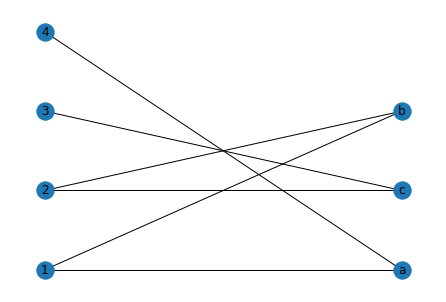

In [27]:

B = nx.Graph()
# 设置每个顶点的归属
B.add_nodes_from([1, 2, 3, 4], bipartite=0)
B.add_nodes_from(["a", "b", "c"], bipartite=1)
# 连线
B.add_weighted_edges_from([(1, "a", 5), (1, "b", 5), (2, "b", 7), (2, "c", 1), (3, "c", 2), (4, "a", 3)])

# 获取两个顶点集合
top_nodes = {n for n, d in B.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(B) - top_nodes
print("顶点集1:",top_nodes)
print("顶点集2:",bottom_nodes)

# 二分图的最大匹配
print(nx.bipartite.hopcroft_karp_matching(B))
# nx.bipartite.maximum_matching(B)

# 确定每个顶点的位置
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(top_nodes))
pos.update((node, (2, index)) for index, node in enumerate(bottom_nodes))
nx.draw(B, pos=pos, with_labels=True)
plt.show()

#### 最大带权匹配
没找到networkx中直接的函数，看来得自己写

或者使用专门解决指派问题的munkres库

[参考博客](https://blog.csdn.net/u011888840/article/details/112982156)

In [28]:
# [参考博客](https://blog.csdn.net/u011888840/article/details/112982156)
class KM:
    def __init__(self):
        self.matrix = None
        self.max_weight = 0
        self.row, self.col = 0, 0  # 源数据行列
        self.size = 0   # 方阵大小
        self.lx = None  # 左侧权值
        self.ly = None  # 右侧权值
        self.match = None   # 匹配结果
        self.slack = None   # 边权和顶标最小的差值
        self.visx = None    # 左侧是否加入增广路
        self.visy = None    # 右侧是否加入增广路

    # 调整数据
    def pad_matrix(self, min):
        if min:
            max = self.matrix.max() + 1
            self.matrix = max-self.matrix

        if self.row > self.col:   # 行大于列，添加列
            self.matrix = np.c_[self.matrix, np.array([[0] * (self.row - self.col)] * self.row)]
        elif self.col > self.row:  # 列大于行，添加行
            self.matrix = np.r_[self.matrix, np.array([[0] * self.col] * (self.col - self.row))]

    def reset_slack(self):
        self.slack.fill(self.max_weight + 1)

    def reset_vis(self):
        self.visx.fill(False)
        self.visy.fill(False)

    def find_path(self, x):
        self.visx[x] = True
        for y in range(self.size):
            if self.visy[y]:
                continue
            tmp_delta = self.lx[x] + self.ly[y] - self.matrix[x][y]
            if tmp_delta == 0:
                self.visy[y] = True
                if self.match[y] == -1 or self.find_path(self.match[y]):
                    self.match[y] = x
                    return True
            elif self.slack[y] > tmp_delta:
                self.slack[y] = tmp_delta

        return False

    def km_cal(self):
        for x in range(self.size):
            self.reset_slack()
            while True:
                self.reset_vis()
                if self.find_path(x):
                    break
                else:  # update slack
                    delta = self.slack[~self.visy].min()
                    self.lx[self.visx] -= delta
                    self.ly[self.visy] += delta
                    self.slack[~self.visy] -= delta

    def compute(self, datas, min=False):
        """
        :param datas: 权值矩阵
        :param min: 是否取最小组合，默认最大组合
        :return: 输出行对应的结果位置
        """
        self.matrix = np.array(datas) if not isinstance(datas, np.ndarray) else datas
        self.max_weight = self.matrix.sum()
        self.row, self.col = self.matrix.shape  # 源数据行列
        self.size = max(self.row, self.col)
        self.pad_matrix(min)
        print(self.matrix)
        self.lx = self.matrix.max(1)
        self.ly = np.array([0] * self.size, dtype=int)
        self.match = np.array([-1] * self.size, dtype=int)
        self.slack = np.array([0] * self.size, dtype=int)
        self.visx = np.array([False] * self.size, dtype=bool)
        self.visy = np.array([False] * self.size, dtype=bool)

        self.km_cal()

        match = [i[0] for i in sorted(enumerate(self.match), key=lambda x: x[1])]
        result = []
        for i in range(self.row):
            result.append((i, match[i] if match[i] < self.col else -1))  # 没有对应的值给-1
        return result


if __name__ == '__main__':
    a = np.array([[84, 65, 3, 34], [65, 56, 23, 35], [63, 18, 35, 12]])
    # a = np.array([[84, 65], [3, 34], [63, 18], [35, 12]])
   
    km = KM()
    min_ = km.compute(a.copy(), True)
    print("最小组合:", min_, a[[i[0] for i in min_], [i[1] for i in min_]])
    max_ = km.compute(a.copy())
    print("最大组合:", max_, a[[i[0] for i in max_], [i[1] for i in max_]])

[[ 1 20 82 51]
 [20 29 62 50]
 [22 67 50 73]
 [ 0  0  0  0]]
最小组合: [(0, 2), (1, 3), (2, 1)] [ 3 35 18]
[[84 65  3 34]
 [65 56 23 35]
 [63 18 35 12]
 [ 0  0  0  0]]
最大组合: [(0, 0), (1, 1), (2, 2)] [84 56 35]


In [29]:
from munkres import Munkres, make_cost_matrix, DISALLOWED

a = np.array([[84, 65, 3, 34], [65, 56, 23, 35], [63, 18, 35, 12]])
b = make_cost_matrix(a, lambda cost: (a.max() - cost) if (cost != DISALLOWED) else DISALLOWED)

mk = Munkres()
# 最小组合
indexes = mk.compute(a.copy()) # 会改变输入的源数据
print("最小组合:",indexes, a[[i[0] for i in indexes], [i[1] for i in indexes]])
# 最大组合
indexes = mk.compute(b)
print("最大组合：", indexes, a[[i[0] for i in indexes], [i[1] for i in indexes]])

最小组合: [(0, 2), (1, 3), (2, 1)] [ 3 35 18]
最大组合： [(0, 0), (1, 1), (2, 2)] [84 56 35]


### 八、有向无环图
拓扑排序、AOE网关键路径

[官方API](https://www.osgeo.cn/networkx/reference/algorithms/dag.html)

[参考博客](https://blog.csdn.net/youcans/article/details/117261314)

拓扑序列：[1, 2, 3, 4, 5, 6, 7, 8]
关键路径：[1, 3, 5, 6, 8]
关键路径长度：51


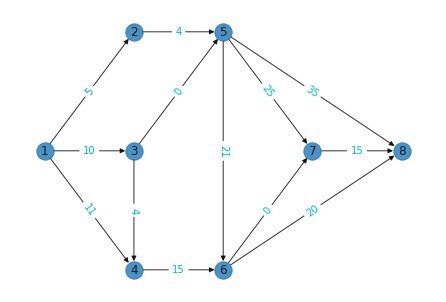

In [30]:
DG = nx.DiGraph()  # 创建：空的 有向图
DG.add_nodes_from(range(1, 8), VE=0, VL=0)
DG.add_weighted_edges_from([(1, 2, 5), (1, 3, 10), (1, 4, 11),
                            (2, 5, 4),
                            (3, 4, 4), (3, 5, 0),
                            (4, 6, 15),
                            (5, 6, 21), (5, 7, 25), (5, 8, 35),
                            (6, 7, 0), (6, 8, 20),
                            (7, 8, 15)]) 
lenNodes = len(DG.nodes)  # 顶点数量
topoSeq = list(nx.topological_sort(DG))  # 拓扑序列
criticalPath = list(nx.dag_longest_path(DG))  # 关键路径（节点）
lenCriticalPath = nx.dag_longest_path_length(DG)  # 关键路径的长度
print("拓扑序列：{}".format(topoSeq))  # [1, 3, 4, 2, 5, 6, 7, 8]
print("关键路径：{}".format(criticalPath))  # [1, 3, 5, 6, 8]
print("关键路径长度：{}".format(lenCriticalPath))  # 51

pos = {1: (0, 4), 2: (5, 8), 3: (5, 4), 4: (5, 0), 5: (10, 8), 6: (10, 0), 7: (15, 4), 8: (20, 4)}  # 指定顶点位置
nx.draw(DG, pos, with_labels=True, alpha=0.8)  # 绘制无向图
labels = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels=labels, font_color='c')  # 显示边的权值
plt.show()